# DATA analysis

## used promoters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
promoters_df = pd.read_csv('../data/raw/promoters.csv')
promoters_df


,no_by_pos,position,name,number,sequence_5_to_3,no_name,id,sys_name,length,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,1,1,pCYC1,1,NaN,1_pCYC1,1_pCYC1_1,YJR048W,NaN,2775.830,3742.74000,2459.6600
1,2,1,pENO2,2,NaN,2_pENO2,2_pENO2_2,YHR174W,NaN,2950.220,2527.27000,84.3614
2,3,1,pPCK1,3,NaN,3_pPCK1,3_pPCK1_3,YKR097W,NaN,1948.900,9.80902,4639.4100
3,4,1,pRPL15B,4,NaN,4_pRPL15B,4_pRPL15B_4,YMR121C,NaN,200.212,186.50900,258.0280
4,1,2,pCCW12,5,NaN,5_pCCW12,5_pCCW12_1,YLR110C,NaN,5496.460,6376.54000,2516.0500
5,2,2,pMLS1,6,NaN,6_pMLS1,6_pMLS1_2,YNL117W,NaN,2222.160,8.09464,5267.0000
6,3,2,pTPI1,7,NaN,7_pTPI1,7_pTPI1_3,YDR050C,NaN,2264.780,2853.86000,209.1640
7,4,2,pURE2,8,NaN,8_pURE2,8_pURE2_4,YNL229C,NaN,253.590,344.07600,222.4390


In [3]:
promoters_df = promoters_df[["name", "NIL_6h_FPKM", "NIL_12h_FPKM", "NIL_24h_FPKM"]]
promoters_df

,name,NIL_6h_FPKM,NIL_12h_FPKM,NIL_24h_FPKM
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [4]:
promoters_df.columns = ['name', 6, 12, 24]
promoters_df

,name,6,12,24
0,pCYC1,2775.830,3742.74000,2459.6600
1,pENO2,2950.220,2527.27000,84.3614
2,pPCK1,1948.900,9.80902,4639.4100
3,pRPL15B,200.212,186.50900,258.0280
4,pCCW12,5496.460,6376.54000,2516.0500
5,pMLS1,2222.160,8.09464,5267.0000
6,pTPI1,2264.780,2853.86000,209.1640
7,pURE2,253.590,344.07600,222.4390


In [5]:
promoters_df = promoters_df.set_index('name')


In [6]:
df_with_prom1 = promoters_df.loc[["pCYC1","pENO2","pPCK1","pRPL15B"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


In [7]:
df_with_prom2 = promoters_df.loc[["pCCW12","pMLS1","pTPI1","pURE2"]].transpose()
df_with_prom1

name,pCYC1,pENO2,pPCK1,pRPL15B
6,2775.83,2950.2200,1948.90000,200.212
12,3742.74,2527.2700,9.80902,186.509
24,2459.66,84.3614,4639.41000,258.028


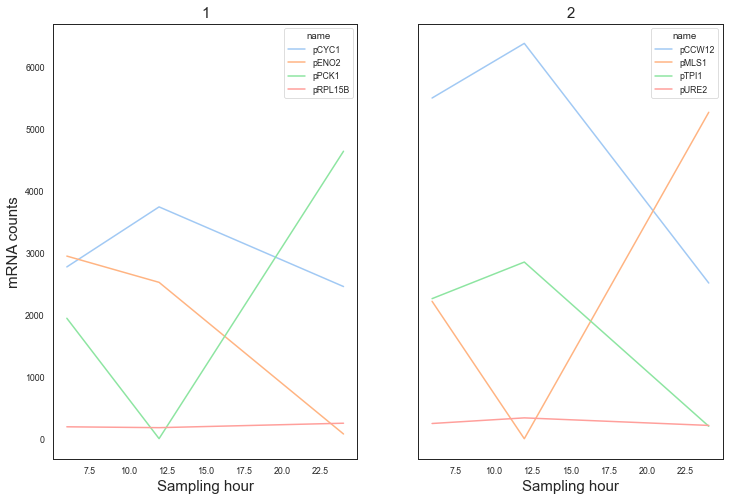

In [8]:
# Plotting an empty subplot

import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()
sns.set_style("white")
sns.set_palette("pastel")
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1.5})

# adding the data to the fig
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8), sharey=True)  # 1 row, 2 columns 

# Adding the DFs
ax1 = df_with_prom1.plot( ax=ax1)
ax2 = df_with_prom2.plot( ax=ax2)

# Adding all the titles
ax1.set_title("1",  fontsize=15)
ax2.set_title("2",  fontsize=15)
ax1.set_ylabel("mRNA counts",  fontsize=15)
ax1.set_xlabel("Sampling hour", fontsize=15)
ax2.set_ylabel("mRNA counts",  fontsize=15)
ax2.set_xlabel("Sampling hour", fontsize=15)
ax1.get_shared_x_axes().join(ax1, ax2)
#plt.savefig('Pictures/Dynamics_of_chosen_promoters.png', dpi = 120)

## DATA wrangling

In [9]:
#1. In Emacs; Result_table_210330_tmet494_Soren.xlsx to .csv N.D. -> N.A.; N.A. -> NA.
#2. Change names to plates names e.g.Result_table_210330_tmet494_Soren.csv -> Result_table_210330_tmet494_yp48Feed-Nofeed.xlsx


In [10]:
#your_df = pd.read_csv('../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren.csv',sep=';',decimal=',')
#your_df.to_csv('../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren1.csv')

In [11]:
import pandas as pd
import glob
import os

results1 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210330_tmet494_Soren1.csv", sep = ',')
#results2 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210519_tmet517_Soren.csv", sep = ',')
#results_merged = pd.concat([results1, results2], ignore_index=True)
results_merged = results1
results_merged

,Unnamed: 0,data_file,sample_notes,AC Samples,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tetrahydroalstonine,Amt_ug_L_Tryptamine,Amt_ug_L_Tryptophan,Unnamed: 10,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,Amt_uM_Tryptophan
0,0,210330_TMET494_032.xms,96WP988_P1_B2,0_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,8009.517,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,49.99074398,N.A.
1,1,210330_TMET494_033.xms,96WP988_P1_B3,0_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,5817.125,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,36.30710898,N.A.
2,2,210330_TMET494_034.xms,96WP988_P1_B4,0_3_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6003.777,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,37.47208214,N.A.
3,3,210330_TMET494_035.xms,96WP988_P1_B5,1_1_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,6635.864,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,41.41720135,N.A.
4,4,210330_TMET494_036.xms,96WP988_P1_B6,1_2_YPD,N.D.,N.D.,N.D.,N.D.,N.D.,7046.096,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,43.97763076,N.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,210330_TMET494_237.xms,96WP989_P2_F11,17_2_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,79827.258,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,498.235289,N.A.
104,104,210330_TMET494_241.xms,96WP989_P2_G2,17_3_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,N.D.,N.D.,97553.734,N.A.,NaN,N.D.,N.D.,N.D.,N.D.,N.D.,608.8736363,N.A.
105,105,210330_TMET494_246.xms,96WP989_P2_G7,15_4_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,623.513,N.D.,113480.148,N.A.,NaN,N.D.,N.D.,N.D.,1.175175754,N.D.,708.2770441,N.A.
106,106,210330_TMET494_247.xms,96WP989_P2_G8,15_5_YPD_YPD + 1 mM tryptamine + 0.2 mM geraniol,N.D.,N.D.,N.D.,576.808,N.D.,122431.367,N.A.,NaN,N.D.,N.D.,N.D.,1.087147784,N.D.,764.1453439,N.A.


In [12]:
# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results_merged.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)


# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 3:11], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 0:1], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, 2:3], inplace = True, axis = 1)
df_filter.drop(df_filter.iloc[:, -1:], inplace = True, axis = 1)

# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

In [13]:
# seperate sample notes into different plates ie. P1, P2, P3: A1, A2... 
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'plate', 'well']
df_filter_plates.iloc[108:, 2:3] = df_filter_plates.iloc[108:, 1:2]
df_filter_plates.iloc[108:, 1:2] = 'P3'

list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

In [14]:
#df_filter[['sample', 'plate', 'well']] = pd.DataFrame([df_filter_plates['sample'], df_filter_plates['plate'], df_filter_plates['well'] ])
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2
concatenated = concatenated.fillna(0.0)

#### adding media rows to the AC_sample column

In [15]:

for index, row in concatenated.iterrows():
    if row['plate'] == 'P1':
        concatenated.iloc[index, 9:10] = 'yp48' 
        
    if row['plate'] == 'P2':
        concatenated.iloc[index, 9:10] = 'yp49' 
        
    if row['plate'] == 'P3':
        concatenated.iloc[index, 9:10] = 'yp50'
    
    if row['plate'] == 'P4':
        concatenated.iloc[index, 9:10] = 'yp51'
    if row['plate'] == 'P5':
        concatenated.iloc[index, 9:10] = 'yp52'
                
    
    # Addding zero betwieen letter and well value. 
    if len(row['well']) == 2:
        listed = list(row['well'])
        with_0 = str(listed[0])+str(0)+ str(listed[1])
        concatenated.iloc[index, 10:11] = with_0
         
Processed_file = concatenated.fillna(0)
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


## Merge Plate design yp48-52 metadata into single csv file


In [16]:
# importing xls file
xls = pd.ExcelFile('../data/raw/023_LC-MS/excel_files/plateDesign_yp48-51_MIA-HA-1-17_21-100.xls')

# reading the different sheets
df1 = pd.read_excel(xls, 'MIA-HA-1-17_yp48')  # plate 48
df1["plate"] = 'yp48' 

df2 = pd.read_excel(xls, 'MIA-HA-51-80_yp49') # plate 49
df2["plate"] = 'yp49' 

df3 = pd.read_excel(xls, 'MIA-HA-21-50_yp50') # plate 50
df3["plate"] = 'yp50' 

df4 = pd.read_excel(xls, 'MIA-HA-81-100_yp51')# plate 51
df4["plate"] = 'yp51' 

df5 = pd.read_excel(xls, 'yp52-HA-71-72')     # plate 52
df5["plate"] = 'yp52' 


In [17]:
results_merged = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [18]:
results_merged

,position,Sample name,Cellular Compartment,Medium,Sample Type,Temperature (C),Timepoint (h),Cultivation Container ID/Position,Operator Name,Replicate #,Strain,genotype,plate,Cellular compartment
0,A01,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
1,A02,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
2,A03,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
3,A04,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
4,A05,NaN,NaN,YPD,Blank,30.0,144.0,NaN,Soeren Petersen,NaN,NaN,NaN,yp48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,H08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
572,H09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
573,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN
574,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp52,NaN


In [19]:
results_merged.to_csv('../data/processed/023_LC-MS/yp48-52_meta_LL.csv', header = True, index = False)

In [20]:
# read into a dataframe
PlateDesign = pd.read_csv('../data/processed/023_LC-MS/yp48-52_meta_LL.csv') 

In [21]:
# we take the columns that we are interested in
PlateDesign= PlateDesign[['plate','position','Strain', 'Replicate #', 'genotype', 'Medium']]
# rename them
PlateDesign.columns = ['plate', 'well', 'strain','col_no', 'genotype', 'medium']
PlateDesign

,plate,well,strain,col_no,genotype,medium
0,yp48,A01,NaN,NaN,NaN,YPD
1,yp48,A02,NaN,NaN,NaN,YPD
2,yp48,A03,NaN,NaN,NaN,YPD
3,yp48,A04,NaN,NaN,NaN,YPD
4,yp48,A05,NaN,NaN,NaN,YPD
...,...,...,...,...,...,...
571,yp52,H08,NaN,NaN,NaN,NaN
572,yp52,H09,NaN,NaN,NaN,NaN
573,yp52,H10,NaN,NaN,NaN,NaN
574,yp52,H11,NaN,NaN,NaN,NaN


In [22]:
Processed_file

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02
1,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03
2,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04
3,210330_TMET494_035.xms,96WP988_P1_B5,0.0,0.0,0.0,0.0,0.0,41.41720135,96WP988,yp48,B05
4,210330_TMET494_036.xms,96WP988_P1_B6,0.0,0.0,0.0,0.0,0.0,43.97763076,96WP988,yp48,B06
...,...,...,...,...,...,...,...,...,...,...,...
103,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11
104,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02
105,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07
106,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08


In [23]:
# Merge our lcms file with the genotype/strain 
merged_inner = pd.merge(Processed_file, PlateDesign, left_on=['plate','well'], right_on = ['plate','well'])
merged_inner

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
0,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD
1,210330_TMET494_032.xms,96WP988_P1_B2,0.0,0.0,0.0,0.0,0.0,49.99074398,96WP988,yp48,B02,MIA-HA-2,1.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD
3,210330_TMET494_033.xms,96WP988_P1_B3,0.0,0.0,0.0,0.0,0.0,36.30710898,96WP988,yp48,B03,MIA-HA-2,2.0,pCYC1_pURE2,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210330_TMET494_034.xms,96WP988_P1_B4,0.0,0.0,0.0,0.0,0.0,37.47208214,96WP988,yp48,B04,MIA-HA-2,3.0,pCYC1_pURE2,YPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,210330_TMET494_237.xms,96WP989_P2_F11,0.0,0.0,0.0,0.0,0.0,498.235289,96WP989,yp49,F11,MIA-HA-74,2.0,CroG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
158,210330_TMET494_241.xms,96WP989_P2_G2,0.0,0.0,0.0,0.0,0.0,608.8736363,96WP989,yp49,G02,MIA-HA-75,2.0,CroG8H RseCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
159,210330_TMET494_246.xms,96WP989_P2_G7,0.0,0.0,0.0,1.175175754,0.0,708.2770441,96WP989,yp49,G07,MIA-HA-77,1.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
160,210330_TMET494_247.xms,96WP989_P2_G8,0.0,0.0,0.0,1.087147784,0.0,764.1453439,96WP989,yp49,G08,MIA-HA-77,2.0,CroG8H AniCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


It seems like we have some duplicates. We can easily get rid of them in the following way:

In [24]:
final_processed_data = merged_inner.drop_duplicates(ignore_index = True, subset=['data_file'])

## YP48 (Cro strains)

\*\*\* Experiment 1. Check if MIA-HA-2 - 17 strains produces MIA's with / without feeding. We suspect that the base strain MIA-HA-1 has lost GES and or TDC (outside strictosidine module). If this is the case our strains will only produce MIA when feed

Strains\
1. YP48

Media feed: 0.2 mM geraniol & 1 mM tryptamine 1. YP + 2 % glucose 2. YP + 2 % glucose + feed

Cultivation 30C, 300 rpm 1. (Wednesday 24): Inoculate precultures. Transfer 10 of YP48 g.stock to 90 media 1 (-feed). 2. (Friday 26): Inoculate maincultures. Transfer 10 of preculture to 500 media 1 and media 2 3. (Monday 8): For each media, one at a time: 1. Transfer 10 of mainculture into 140 to measure OD (in incubator while measuring) 2. Transfer 200 into new 96 well plate, 3. Add 20 uL 10 mg/L caffeine stock 4. Add X ul Std_MM_v13 standards 5. Transfer 220 onto filter in collection plate, centrifuge (2000 g x 1 min; put collection plate in -80C) 6. Measure MIAs (extracellular loganin) 4. (TBD): Khem run plate 5. (TBD): Data analysis

\*\*\*\* Analytics notes: Notes from Khem: N:D.: not detected or below quantification limits; N.A.: not analyzed; Loganin, strictosidine and tryptamine are quantifiable and others are not quantifiable. Some samples might have been not integrated because of low abundance of the peak


In [25]:
# we have to make all the values into floats in order to sort them later
final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')


/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_48568/2972764381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_data['Amt_uM_Strictosidine'] = pd.to_numeric(final_processed_data['Amt_uM_Strictosidine'], downcast='float')


In [26]:
sorted_df = final_processed_data.sort_values(by='Amt_uM_Strictosidine', ascending=False)
yp48 = sorted_df.loc[sorted_df['plate'] == 'yp48']
yp48.head()

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
40,210330_TMET494_097.xms,96WP988_P1_F2,0.0,0.0,0.0,0.0,0.0,52.05727749,96WP988,yp48,F02,MIA-HA-15,2.0,pRPL15B_pTPI1,YPD
14,210330_TMET494_049.xms,96WP988_P1_C6,0.0,0.0,0.0,0.0,0.0,48.16994133,96WP988,yp48,C06,MIA-HA-6,3.0,pENO2_pURE2,YPD
15,210330_TMET494_050.xms,96WP988_P1_C7,0.0,0.0,0.0,0.0,0.0,49.85464362,96WP988,yp48,C07,MIA-HA-7,1.0,pENO2_pTPI1,YPD
16,210330_TMET494_051.xms,96WP988_P1_C8,0.0,0.0,0.0,0.0,0.0,43.8310885,96WP988,yp48,C08,MIA-HA-7,2.0,pENO2_pTPI1,YPD
12,210330_TMET494_047.xms,96WP988_P1_C4,0.0,0.0,0.0,0.0,0.0,41.23962676,96WP988,yp48,C04,MIA-HA-6,1.0,pENO2_pURE2,YPD


In [27]:
yp49 = sorted_df.loc[sorted_df['plate'] == 'yp49']
yp49.head()

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tetrahydroalstonine,Amt_uM_Tryptamine,sample,plate,well,strain,col_no,genotype,medium
69,210330_TMET494_181.xms,96WP989_P2_C7,0.0,4.126650955,0.0,26.206121,0.0,516.8216952,96WP989,yp49,C07,MIA-HA-61,1.0,OpumG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
70,210330_TMET494_182.xms,96WP989_P2_C8,0.0,3.72660997,0.0,22.001720,0.0,663.9293846,96WP989,yp49,C08,MIA-HA-61,2.0,OpumG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
77,210330_TMET494_192.xms,96WP989_P2_D5,0.0,3.676697064,0.0,21.646608,0.0,544.414761,96WP989,yp49,D05,MIA-HA-64,2.0,OpumG8H CloCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
71,210330_TMET494_183.xms,96WP989_P2_C9,0.0,3.294851171,0.0,21.050240,0.0,342.8212957,96WP989,yp49,C09,MIA-HA-61,3.0,OpumG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
75,210330_TMET494_190.xms,96WP989_P2_D3,0.0,2.52681746,0.0,18.588539,0.0,520.9128948,96WP989,yp49,D03,MIA-HA-63,3.0,OpumG8H AraCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


## Conclusion 
1. Bg strain mutated & lost genes 
2. Promoters course large variation - continously low (pRPL15b) doesn't work well for G8H but does for alright for CPR (pURE) 
3. Has strain lost tryptamine synthase or geraniol synthesis genes?


Now doing the same with the other data 

## YP49-51 (library strains)

\*\*\* Experiment:

-   Strains: 3 colonies from each of 80 library plates. Each plate has specific combination of G8H and CPR but any of 16 possible promoter combinations
-   Media: YP + 2 % glucose + feed 0.2 mM geraniol & 1 mM tryptamine
-   Sampling: day 6

\*\*\*\* Analytics notes:

-   More than 500 uM tryptamine in all samples
-   No Loganic acid or Secologanin detected in any sample

**Wells not injected/acquired:**

-   Khem is not sure why.
    -   Volume is high enough.
    -   No bubbles as samples where filtered before handover (as well as spun down by Khem)
    -   Column clogging due to YPD?

Run 1

-   YP49
    -   A3, B1

Run 2

-   YP50
    -   :A9 A10, B3, B5, B9, C2, C4, C5, C9, D6
-   YP51
    -   :A3, A4, A9, A11, B7, B9, B10, C9, D3, E4

Run 3:

Rerun of samples not injected in run 2 as well as control(H7-11) for both plates rerun

-   YP50
    -   C5 and H7-11
-   YP51
    -   A11 and B9

In [28]:
# Lets read in all the plates
plate49 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210519_tmet517_Soren.csv", sep = ',')
plate50 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210603_tmet525_yp50.csv", sep = ',')
plate51 = pd.read_csv("../data/raw/023_LC-MS/Result_table_210603_tmet525_yp51.csv", sep = ',')

# Stack the DataFrames on top of each other
results2 = pd.concat([plate49, plate50,plate51 ], axis=0)
results2

,data_file,sample_notes,Amt_ug_L_Loganic acid,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tryptamine,Unnamed: 7,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine
0,210519_TMET517_018.xms,96WP1056_A01,NaN,NaN,NaN,143.890,146892.391,NaN,NaN,NaN,NaN,0.271199,916.816821
1,210519_TMET517_019.xms,96WP1056_A02,NaN,NaN,NaN,39.852,160741.781,NaN,NaN,NaN,NaN,0.075112,1003.256653
2,210519_TMET517_020.xms,96WP1056_A03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210519_TMET517_021.xms,96WP1056_A04,NaN,NaN,NaN,29.985,135912.563,NaN,NaN,NaN,NaN,0.056515,848.287124
4,210519_TMET517_022.xms,96WP1056_A05,NaN,NaN,NaN,NaN,127009.570,NaN,NaN,NaN,NaN,NaN,792.719823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,210603_TMET525_260.xms,96WPYP51_H8,NaN,716.115,NaN,15859.590,180041.953,NaN,NaN,1.834405,NaN,29.891607,1123.717095
62,210603_TMET525_261.xms,96WPYP51_H9,NaN,606.494,NaN,14590.223,151496.813,NaN,NaN,1.553599,NaN,27.499148,945.554943
63,210603_TMET525_262.xms,96WPYP51_H10,NaN,NaN,NaN,23690.100,193096.094,NaN,NaN,NaN,NaN,44.650282,1205.193447
64,210603_TMET525_263.xms,96WPYP51_H11,NaN,15248.204,NaN,74476.773,343782.531,NaN,NaN,39.059901,NaN,140.371248,2145.690494


 We filter for rows that has at least one of these compounds: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'

In [29]:

# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = results2.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)

# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 2:8], inplace = True, axis = 1)
df_filter
# saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()

# split the sample notes column
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates.columns = ['sample', 'well']
list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()

# Add the to dataframes together
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2

# FIX THIS
#oncatenated.insert(loc=8, column='plate', value = 'x')

#df_filter_plates 
concatenated = concatenated.fillna(0)

In [30]:
concatenated

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,96WP1056,A01
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,96WP1056,A02
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.000000,0.0,0.056515,848.287124,96WP1056,A04
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.000000,0.0,0.000000,792.719823,96WP1056,A05
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.000000,0.0,0.315968,1061.010835,96WP1056,A06
...,...,...,...,...,...,...,...,...,...
61,210603_TMET525_260.xms,96WPYP51_H8,0.0,1.834405,0.0,29.891607,1123.717095,96WPYP51,H8
62,210603_TMET525_261.xms,96WPYP51_H9,0.0,1.553599,0.0,27.499148,945.554943,96WPYP51,H9
63,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.000000,0.0,44.650282,1205.193447,96WPYP51,H10
64,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11


In [31]:
# copying sample to plate
results_copy = concatenated.copy()
results_copy['plate'] = results_copy['sample']
results_copy

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,96WP1056,A01,96WP1056
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,96WP1056,A02,96WP1056
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.000000,0.0,0.056515,848.287124,96WP1056,A04,96WP1056
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.000000,0.0,0.000000,792.719823,96WP1056,A05,96WP1056
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.000000,0.0,0.315968,1061.010835,96WP1056,A06,96WP1056
...,...,...,...,...,...,...,...,...,...,...
61,210603_TMET525_260.xms,96WPYP51_H8,0.0,1.834405,0.0,29.891607,1123.717095,96WPYP51,H8,96WPYP51
62,210603_TMET525_261.xms,96WPYP51_H9,0.0,1.553599,0.0,27.499148,945.554943,96WPYP51,H9,96WPYP51
63,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.000000,0.0,44.650282,1205.193447,96WPYP51,H10,96WPYP51
64,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,96WPYP51


getting the right plate name

In [32]:
results_copy.loc[results_copy['plate'] == '96WP1056', 'plate'] = 'yp49'
results_copy.loc[results_copy['plate'] == '96WPYP50', 'plate'] = 'yp50'
results_copy.loc[results_copy['plate'] == '96WPYP51', 'plate'] = 'yp51'

results_copy

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,96WP1056,A01,yp49
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,96WP1056,A02,yp49
3,210519_TMET517_021.xms,96WP1056_A04,0.0,0.000000,0.0,0.056515,848.287124,96WP1056,A04,yp49
4,210519_TMET517_022.xms,96WP1056_A05,0.0,0.000000,0.0,0.000000,792.719823,96WP1056,A05,yp49
5,210519_TMET517_023.xms,96WP1056_A06,0.0,0.000000,0.0,0.315968,1061.010835,96WP1056,A06,yp49
...,...,...,...,...,...,...,...,...,...,...
61,210603_TMET525_260.xms,96WPYP51_H8,0.0,1.834405,0.0,29.891607,1123.717095,96WPYP51,H8,yp51
62,210603_TMET525_261.xms,96WPYP51_H9,0.0,1.553599,0.0,27.499148,945.554943,96WPYP51,H9,yp51
63,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.000000,0.0,44.650282,1205.193447,96WPYP51,H10,yp51
64,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,yp51


In [33]:
# Merge our lcms file with the genotype/strain - THis is based on which plate it is and which well
merged_inner1 = pd.merge(results_copy, PlateDesign, left_on=['plate','well'], right_on = ['plate','well'])
merged_inner1

,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium
0,210519_TMET517_018.xms,96WP1056_A01,0.0,0.000000,0.0,0.271199,916.816821,96WP1056,A01,yp49,MIA-HA-51,1.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
1,210519_TMET517_019.xms,96WP1056_A02,0.0,0.000000,0.0,0.075112,1003.256653,96WP1056,A02,yp49,MIA-HA-51,2.0,CacuG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
2,210519_TMET517_021.xms,96WP1056_A04,0.0,0.000000,0.0,0.056515,848.287124,96WP1056,A04,yp49,MIA-HA-52,1.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
3,210519_TMET517_022.xms,96WP1056_A05,0.0,0.000000,0.0,0.000000,792.719823,96WP1056,A05,yp49,MIA-HA-52,2.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
4,210519_TMET517_023.xms,96WP1056_A06,0.0,0.000000,0.0,0.315968,1061.010835,96WP1056,A06,yp49,MIA-HA-52,3.0,CacuG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,210603_TMET525_224.xms,96WPYP51_E11,0.0,0.000000,0.0,0.000000,1567.396099,96WPYP51,E11,yp51,MIA-HA-100,2.0,CcalG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
129,210603_TMET525_225.xms,96WPYP51_E12,0.0,0.000000,0.0,0.153556,1103.389383,96WPYP51,E12,yp51,MIA-HA-100,3.0,CcalG8H CpoCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
130,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.000000,0.0,44.650282,1205.193447,96WPYP51,H10,yp51,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol
131,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,yp51,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol


Lets normalize the strictosidine productions


In [34]:
control_strict_df = merged_inner1.loc[merged_inner1['strain'] == 'MIA-CH-A2']
df_mean = control_strict_df["Amt_uM_Strictosidine"].mean()


In [35]:
norm_strict_df = merged_inner1.copy()
norm_strict_df['norm_strict_%'] = 0

In [36]:
for index, row in norm_strict_df.iterrows():
    normalized = round(((row['Amt_uM_Strictosidine']/df_mean)*100),3)
    norm_strict_df.at[index, 'norm_strict_%'] = normalized

In [37]:
# we have to make all the values into floats in order to sort them 
#merged_inner1['Amt_uM_Strictosidine'] = pd.to_numeric(merged_inner1['Amt_uM_Strictosidine'], downcast='float')
sorted_df = norm_strict_df.sort_values(by='norm_strict_%', ascending=False)
sorted_df = sorted_df.reset_index()

sorted_df

,index,data_file,sample_notes,Amt_uM_Loganic acid,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,sample,well,plate,strain,col_no,genotype,medium,norm_strict_%
0,131,210603_TMET525_263.xms,96WPYP51_H11,0.0,39.059901,0.0,140.371248,2145.690494,96WPYP51,H11,yp51,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,428.763
1,115,210603_TMET525_132.xms,96WPYP50_H11,0.0,20.403579,0.0,70.904456,1204.654344,96WPYP50,H11,yp50,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,216.577
2,130,210603_TMET525_262.xms,96WPYP51_H10,0.0,0.000000,0.0,44.650282,1205.193447,96WPYP51,H10,yp51,MIA-CH-A2,4.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,136.384
3,92,210519_TMET517_132.xms,96WP1056_H11,0.0,13.840299,0.0,41.660256,623.483435,96WP1056,H11,yp49,MIA-CM-3,1.0,CroG8H CroCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,127.251
4,61,210519_TMET517_099.xms,96WP1056_F04,0.0,3.810549,0.0,38.738052,620.003695,96WP1056,F04,yp49,MIA-HA-72,1.0,CroG8H AanCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,118.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,15,210519_TMET517_036.xms,96WP1056_B06,0.0,0.000000,0.0,0.000000,731.498976,96WP1056,B06,yp49,MIA-HA-56,3.0,CacuG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
129,14,210519_TMET517_035.xms,96WP1056_B05,0.0,0.000000,0.0,0.000000,672.271133,96WP1056,B05,yp49,MIA-HA-56,2.0,CacuG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
130,102,210603_TMET525_066.xms,96WPYP50_D10,0.0,0.000000,0.0,0.000000,1700.038422,96WPYP50,D10,yp50,MIA-HA-36,1.0,SmusG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000
131,103,210603_TMET525_067.xms,96WPYP50_D11,0.0,0.000000,0.0,0.000000,1129.826177,96WPYP50,D11,yp50,MIA-HA-36,2.0,SmusG8H AhuCPR,YPD + 1 mM tryptamine + 0.2 mM geraniol,0.000


In [38]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


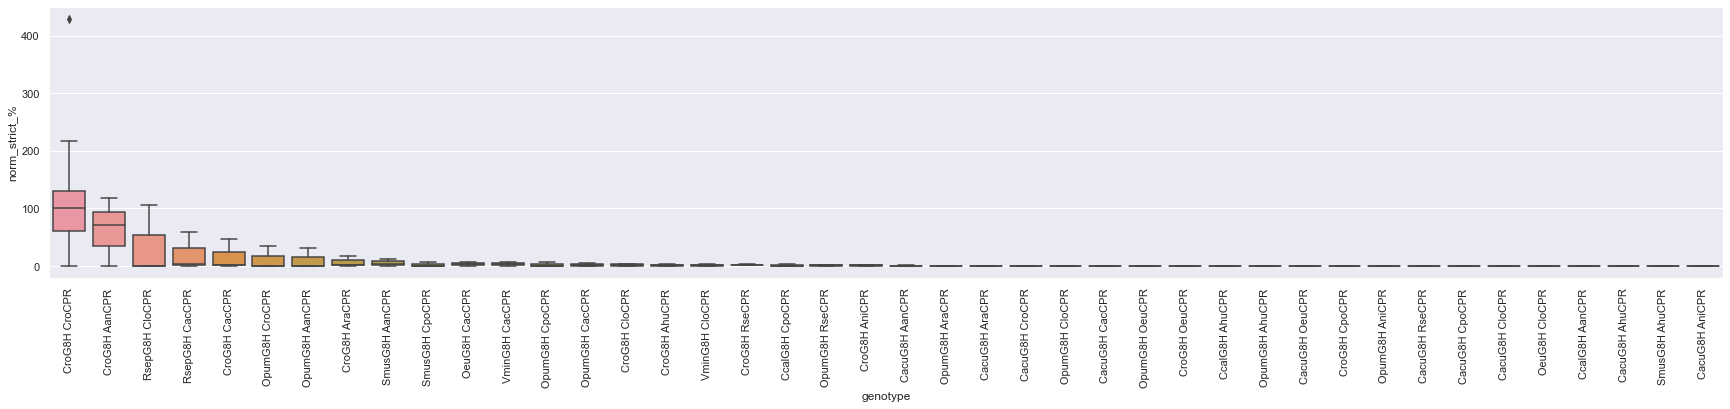

In [39]:
box_plot=sns.boxplot(x='genotype', y='norm_strict_%',data=sorted_df)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

This plot will take the same genotypes and make error bars. we are not interested in that. see below instesad. 

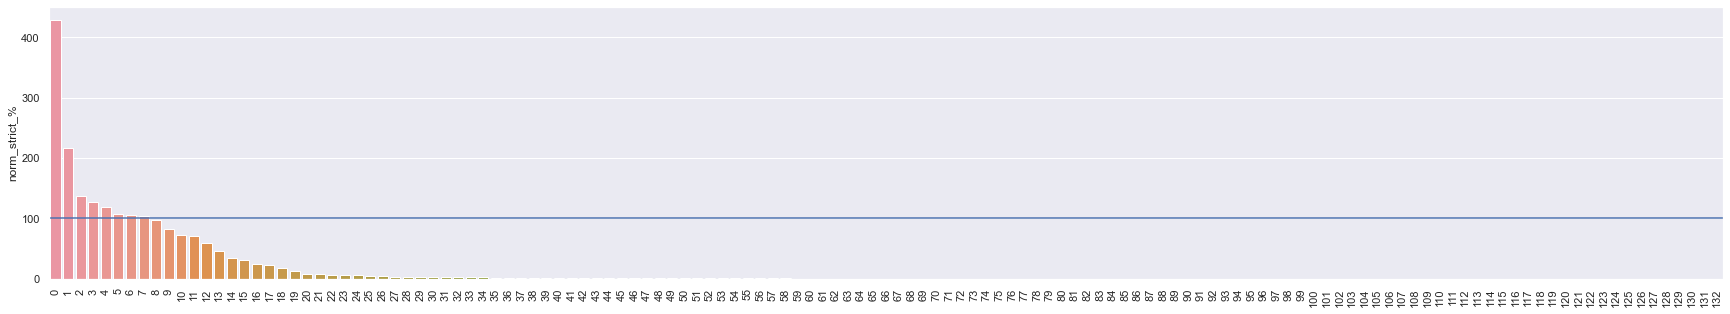

In [40]:
histogram = sns.barplot(data=sorted_df, x=sorted_df.index, y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

In [41]:
## FIRST TRY WITH THIS PYTHON PACKAGE

In [42]:
import sanger_sequencing

config = sanger_sequencing.Configuration()
print(config.threshold)
print(config.output)

50.0
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp6cnh8o4q


/Users/lucaslevassor/opt/anaconda3/envs/constrain/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


def sanger_report(
    template: DataFrame,
    plasmids: typing.Dict[str, SeqRecord],
    samples: typing.Dict[str, SeqRecord],
    threshold: typing.Optional[float] = None,
    output: typing.Optional[typing.Union[str, Path]] = None,
) -> SangerReportInternal:

# Genotyping

In [43]:
path = '../data/raw/10_Sanger_results/'
files = os.listdir(path)
files

['PlateReport_yp51_cpr.xls',
 'PlateReport_yp49_cpr.xls',
 'PlateReport_yp50_cpr.xls',
 'PlateReport_yp51_g8h.xls',
 'ab1',
 'PlateReport_yp50_g8h.xls',
 'PlateReport_yp49_g8h.xls',
 '.ipynb_checkpoints',
 'sanger_fasta']

In [44]:
yp49_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp49_cpr.xls')
yp49_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp49_g8h.xls')
yp50_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp50_cpr.xls')
yp50_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp50_g8h.xls')
yp51_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp51_cpr.xls')
yp51_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp51_g8h.xls')

sequencing_plates = [yp49_cpr, yp49_g8h, yp50_cpr, yp50_g8h, yp51_cpr, yp51_g8h]

In [45]:
yp49_cpr.head(50)

,Plate: yp49_cpr,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,mean used length: 599 n,NaN,NaN,NaN,NaN,NaN,NaN
1,"used length < 100 n: 33 (34,74%)",NaN,NaN,NaN,NaN,NaN,NaN
2,"used length > 100 < 500 n: 4 (4,21%)",NaN,NaN,NaN,NaN,NaN,NaN
3,"used length > 500 n: 58 (61,05%)",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7,593,585
8,2,yp49_cpr_B1_pad_cpr_fw,19.63,1029,115,144,28
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6,591,584


In [46]:

def slicing_and_naming_seq_plates(sequencing_plates, where_to_slice = 7) -> list: 

    # changing column names and slicing
    for i in range(len(sequencing_plates)): 
        sequencing_plates[i].columns = ("Number", "Sample-Name", "AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used")#sequencing_plates[0].iloc[6]
        sequencing_plates[i] = sequencing_plates[i][where_to_slice:]
        
        
    return sequencing_plates


In [47]:
# making all values floats

def plat_seq_data_wrangler(sequencing_plates) -> list:

    list_with_dfs =[]
    
    for i in range(len(sequencing_plates)):
        # taking only a subset of the dataframe:
        numeric_values = sequencing_plates[i][["AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used"]]

        # if values are non nummeric make them NaN
        numeric_values = numeric_values.replace('n.a.', np.NaN)

        # Making them numeric
        numeric_values = numeric_values.apply(pd.to_numeric, errors='coerce')

        # Adding names column
        name_column = sequencing_plates[i]["Sample-Name"]
        number_column = sequencing_plates[i]["Number"]
        
        # Adding them to the dataframe
        data1 = pd.concat([number_column, name_column,numeric_values], axis = 1)
        list_with_dfs.append(data1)

    return list_with_dfs

In [48]:
sliced_plates = slicing_and_naming_seq_plates(sequencing_plates)

In [49]:
list_of_dfs = plat_seq_data_wrangler(sliced_plates)
list_of_dfs[0]

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,1,yp49_cpr_A1_pad_cpr_fw,57.51,1184,7.0,593.0,585
8,2,yp49_cpr_B1_pad_cpr_fw,19.63,1029,115.0,144.0,28
9,3,yp49_cpr_C1_pad_cpr_fw,57.35,1097,6.0,591.0,584
10,4,yp49_cpr_D1_pad_cpr_fw,57.43,1282,11.0,1057.0,1045
11,5,yp49_cpr_E1_pad_cpr_fw,57.21,1192,5.0,594.0,588
...,...,...,...,...,...,...,...
97,91,yp49_cpr_C12_pad_cpr_fw,19.31,539,305.0,320.0,14
98,92,yp49_cpr_D12_pad_cpr_fw,43.65,1125,78.0,501.0,422
99,93,yp49_cpr_E12_pad_cpr_fw,50.82,1152,15.0,1089.0,1073
100,94,yp49_cpr_F12_pad_cpr_fw,47.03,1141,78.0,1066.0,987


In [50]:
def plate_AvgQual(list_of_dfs_numeric, Avg_qual = 50, used_bases = 25 ) -> list:
    
    # Initialize
    filtered_plates = []

    for i in range(len(list_of_dfs_numeric)):
        # Filter 
        filter_Avg_qual = list_of_dfs_numeric[i][list_of_dfs_numeric[i]["AvgQual"] > Avg_qual ]
        filer_used_bases = filter_Avg_qual[filter_Avg_qual["used"] > used_bases ]
        # Save the filtered plates
        filtered_plates.append(filer_used_bases)
    
    return filtered_plates

In [51]:
FILTER = plate_AvgQual(list_of_dfs)
FILTER[1].head(20)

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used
7,1,yp49_g8h_A1_pad_g8h_fw,55.64,1205,11.0,1002.0,990
8,2,yp49_g8h_B1_pad_g8h_fw,55.84,705,14.0,705.0,690
9,3,yp49_g8h_C1_pad_g8h_fw,55.93,1212,9.0,950.0,940
11,5,yp49_g8h_E1_pad_g8h_fw,54.74,1091,20.0,370.0,349
12,6,yp49_g8h_F1_pad_g8h_fw,55.13,1244,13.0,963.0,949
13,7,yp49_g8h_G1_pad_g8h_fw,56.46,1195,11.0,913.0,901
14,8,yp49_g8h_H1_pad_g8h_fw,57.16,1231,13.0,988.0,974
15,9,yp49_g8h_A2_pad_g8h_fw,57.86,1231,16.0,965.0,948
16,10,yp49_g8h_B2_pad_g8h_fw,56.12,1191,9.0,946.0,936
17,11,yp49_g8h_C2_pad_g8h_fw,57.34,1237,13.0,963.0,949


In [52]:
def split_df_names(df_names_column, which_column_to_split1 = 0, which_column_to_split2 = 2 ) -> list: 
    
    df_with_names_split =[]
    
    for i in range(len(df_names_column)):
        # splitting
        df_filter_plates = df_names_column[i]['Sample-Name'].str.split('_', expand=True)
        
        # selecting
        column1 = df_filter_plates[which_column_to_split1]
        column2 = df_filter_plates[which_column_to_split2]
        #column3 = df_filter_plates[3:]

        
        # concating
        concatenated = pd.concat([df_names_column[i], column1, column2], axis=1, ignore_index=False)
        
        # changing names 
        concatenated.columns = ("Number", "Sample-Name", "AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used", 'plate', 'well')
        
        # save 
        df_with_names_split.append(concatenated)
        
    return df_with_names_split

In [53]:
def concatenating_list_of_dfs(list_of_dfs:list): 
    ''' concatenating dataframes '''
    assembled_dfs = pd.concat(list_of_dfs, axis=0, ignore_index=False)
    
    return assembled_dfs

### Data wrangling of plateSeq2 excel files

In [54]:
#Slicing plate data
sliced_plates = slicing_and_naming_seq_plates(sequencing_plates)

# Making the values numeric
list_of_dfs = plat_seq_data_wrangler(sliced_plates)

#filter them on their 
filtered_plates = plate_AvgQual(list_of_dfs)

# Split names
split_df = split_df_names(filtered_plates)

# concatenating the plates
all_data_frames = concatenating_list_of_dfs(split_df)

# Changing names

merged_with_genotyping = pd.merge(sorted_df, all_data_frames, left_on=['plate','well'], right_on = ['plate','well'])

#merged_with_genotyping
all_data_frames

,Number,Sample-Name,AvgQual,Length,GoodQualFrom,GoodQualTo,used,plate,well
14,8,yp49_cpr_H1_pad_cpr_fw,54.35,1220,5.0,1100.0,1094,yp49,H1
15,9,yp49_cpr_A2_pad_cpr_fw,54.63,1299,9.0,1167.0,1157,yp49,A2
16,10,yp49_cpr_B2_pad_cpr_fw,53.04,1301,17.0,1169.0,1151,yp49,B2
17,11,yp49_cpr_C2_pad_cpr_fw,55.01,1323,9.0,1124.0,1114,yp49,C2
18,12,yp49_cpr_D2_pad_cpr_fw,52.93,1119,12.0,592.0,579,yp49,D2
...,...,...,...,...,...,...,...,...,...
60,54,yp51_g8h_D11_pad_g8h_fw,54.95,1206,14.0,1135.0,1120,yp51,D11
61,55,yp51_g8h_E11_pad_g8h_fw,57.72,1199,16.0,987.0,970,yp51,E11
62,56,yp51_g8h_A12_pad_g8h_fw,57.45,1167,18.0,987.0,968,yp51,A12
64,58,yp51_g8h_C12_pad_g8h_fw,57.46,1207,12.0,960.0,947,yp51,C12


### Infering promoter to sample relationship

### samger reporst

In [55]:
from Bio import SeqIO
# GEtting the objects from the gb files
sanger_seq = []
for seq_record in SeqIO.parse('../data/raw/10_Sanger_results/sanger_fasta/Plate_yp49_cpr.fasta', format= 'fasta'):
    sanger_seq.append(seq_record)
sanger_seq[0:10]

[SeqRecord(seq=Seq('NNNNCCGTANTGNAGGGCTACCAAAAACGATAATCTCAACTGTAAACAGGTApl...CCN'), id='yp49_cpr_A1_pad_cpr_fw', name='yp49_cpr_A1_pad_cpr_fw', description='yp49_cpr_A1_pad_cpr_fw', dbxrefs=[]),
 SeqRecord(seq=Seq('NNTTANNANAAAACNNACNAATAANTCNNN'), id='yp49_cpr_B1_pad_cpr_fw', name='yp49_cpr_B1_pad_cpr_fw', description='yp49_cpr_B1_pad_cpr_fw', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNCCGTNNTGANNGGCTACCAAAAACGATAATCTCAACTGTAAACAGGTACA...NNN'), id='yp49_cpr_C1_pad_cpr_fw', name='yp49_cpr_C1_pad_cpr_fw', description='yp49_cpr_C1_pad_cpr_fw', dbxrefs=[]),
 SeqRecord(seq=Seq('TTGGNNTTNNTCAATTTGATGAANTCCGTGTAANCCATGAGGCTTCTTCAAATG...NTN'), id='yp49_cpr_D1_pad_cpr_fw', name='yp49_cpr_D1_pad_cpr_fw', description='yp49_cpr_D1_pad_cpr_fw', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNCCGTANTGANGGGCTACCAAAAACGATAATCTCAACTGTAAACAGGTA...CNN'), id='yp49_cpr_E1_pad_cpr_fw', name='yp49_cpr_E1_pad_cpr_fw', description='yp49_cpr_E1_pad_cpr_fw', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNTANNTTCCAAAAANNCAATAGCATGCAGGAC

#### primers

In [56]:
pad_pG8H_fw = SeqIO.read('../notebooks/pad_pG8H_fw.fasta', format = 'fasta')
pad_pCPR_fw = SeqIO.read('../notebooks/pad_pCPR_fw.fasta', format = 'fasta')


### promoter

In [57]:
pCPR = []
for seq_record in SeqIO.parse('../data/promoter_gb_files/pCPR_sites.gb', format= 'gb'):
    pCPR.append(seq_record)
    
pG8H = []
for seq_record in SeqIO.parse('../data/promoter_gb_files/pG8H_sites.gb', format= 'gb'):
    pG8H.append(seq_record)
    
templates = pCPR+pG8H

In [58]:
import sanger_sequencing

config = sanger_sequencing.Configuration()
print(config.threshold)
print(config.output)

50.0
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp6cnh8o4q


In [59]:
path = '../data/raw/10_Sanger_results/ab1'
files = os.listdir(path)
files

['yp49_cpr_E3_pad_cpr_fw.ab1',
 'yp49_cpr_D6_pad_cpr_fw.ab1',
 'yp49_cpr_C7_pad_cpr_fw.ab1',
 'yp49_cpr_B2_pad_cpr_fw.ab1',
 'yp49_cpr_E10_pad_cpr_fw.ab1',
 'yp49_cpr_A11_pad_cpr_fw.ab1',
 'yp49_cpr_C8_pad_cpr_fw.ab1',
 'yp49_cpr_D9_pad_cpr_fw.ab1',
 'yp49_cpr_D1_pad_cpr_fw.ab1',
 'yp49_cpr_E4_pad_cpr_fw.ab1',
 'yp49_cpr_B5_pad_cpr_fw.ab1',
 'yp49_cpr_E5_pad_cpr_fw.ab1',
 'yp49_cpr_C1_pad_cpr_fw.ab1',
 'yp49_cpr_B4_pad_cpr_fw.ab1',
 'yp49_cpr_A10_pad_cpr_fw.ab1',
 'yp49_cpr_C9_pad_cpr_fw.ab1',
 'yp49_cpr_E11_pad_cpr_fw.ab1',
 'yp49_cpr_D12_pad_cpr_fw.ab1',
 'yp49_cpr_D8_pad_cpr_fw.ab1',
 'yp49_cpr_D7_pad_cpr_fw.ab1',
 'yp49_cpr_E2_pad_cpr_fw.ab1',
 'yp49_cpr_B3_pad_cpr_fw.ab1',
 'yp49_cpr_C6_pad_cpr_fw.ab1',
 'yp49_cpr_B1_pad_cpr_fw.ab1',
 'yp49_cpr_C4_pad_cpr_fw.ab1',
 'yp49_cpr_D5_pad_cpr_fw.ab1',
 'yp49_cpr_E8_pad_cpr_fw.ab1',
 'yp49_cpr_B9_pad_cpr_fw.ab1',
 'yp49_cpr_C3_pad_cpr_fw.ab1',
 'yp49_cpr_B6_pad_cpr_fw.ab1',
 'yp49_cpr_E7_pad_cpr_fw.ab1',
 'yp49_cpr_D2_pad_cpr_fw.ab1',
 'y

In [60]:
reads = []
for read in files: 
    reads.append(SeqIO.read('../data/raw/10_Sanger_results/ab1/'+read, 'abi'))


In [61]:
reads[0].id

'A-352514_E3'

In [62]:
from sanger_sequencing.api import sanger_verification, sample_report

template: DataFrame,
                        plasmids: Dict[str, SeqRecord],
                        samples: Dict[str, SeqRecord]
                        ) -> List[Dict]:
                        
                        
def sample_report(sample_id: str,
                  sample_sequence: SeqRecord,
                  primer_id: str,
                  plasmid_id: str,
                  plasmid_sequence: SeqRecord) -> Dict:

In [72]:
pad_pG8H_fw

SeqRecord(seq=Seq('TGCCCATTCGATAAGGCA'), id='seq_mSRja9xj', name='seq_mSRja9xj', description='seq_mSRja9xj <unknown description>', dbxrefs=[])

In [74]:
templates_id = [template.id for template in templates]
pad_id = [pad_pG8H_fw.id]
sample_id = [read.id for read in reads]

In [75]:
import itertools
c = list(itertools.product(templates_id,pad_id,  sample_id))
len(c)

320

In [76]:
df = pd.DataFrame(c, columns=[ 'plasmid', 'primer', 'sample'])
df

,plasmid,primer,sample
0,seq_KLllyItE,seq_mSRja9xj,A-352514_E3
1,seq_KLllyItE,seq_mSRja9xj,A-352514_D6
2,seq_KLllyItE,seq_mSRja9xj,A-352514_C7
3,seq_KLllyItE,seq_mSRja9xj,A-352514_B2
4,seq_KLllyItE,seq_mSRja9xj,A-352514_E10
...,...,...,...
315,seq_NFnLfXI8,seq_mSRja9xj,A-352514_D11
316,seq_NFnLfXI8,seq_mSRja9xj,A-352514_B7
317,seq_NFnLfXI8,seq_mSRja9xj,A-352514_C2
318,seq_NFnLfXI8,seq_mSRja9xj,A-352514_D3


In [77]:
templates_dict = { str(SeqRecord.name) : SeqRecord for SeqRecord in templates }
reads_dict = { str(SeqRecord.name) : SeqRecord for SeqRecord in reads }


In [78]:
#report = sample_report('sample1', ab1_a10, 'primer1','plasmid1' ,pCPR[0])

In [120]:
def build_kmers(sequence, ksize, pad):
    kmers = []
    n_kmers = len(sequence) - ksize + 1

    for i in range(n_kmers):
        kmer = sequence[i:i + ksize]
        if 'N' in kmer: 
            continue
        if pad in kmer: 
            continue
        else: 
            kmers.append(kmer)

    return kmers

In [101]:
len(reads[0].seq[100:200])

100

In [108]:
reads_dict

{'yp49_cpr_E3_pad_cpr_fw': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNATGAANNNNNTGTAAAANCATGAG...NNN'), id='A-352514_E3', name='yp49_cpr_E3_pad_cpr_fw', description='', dbxrefs=[]),
 'yp49_cpr_D6_pad_cpr_fw': SeqRecord(seq=Seq('NNNNN'), id='A-352514_D6', name='yp49_cpr_D6_pad_cpr_fw', description='', dbxrefs=[]),
 'yp49_cpr_C7_pad_cpr_fw': SeqRecord(seq=Seq('NNNNN'), id='A-352514_C7', name='yp49_cpr_C7_pad_cpr_fw', description='', dbxrefs=[]),
 'yp49_cpr_B2_pad_cpr_fw': SeqRecord(seq=Seq('NNNNNNNNNNGANNNNNNNTGGGNAGANTCGTCTTCTGNAGACGAAAGTGAAGA...NNN'), id='A-352514_B2', name='yp49_cpr_B2_pad_cpr_fw', description='', dbxrefs=[]),
 'yp49_cpr_E10_pad_cpr_fw': SeqRecord(seq=Seq('NNNNNNAAGNNNNGGNNNNTTGNNTANTTTCCAAAAATCAATAGCATGCAGGAC...AAT'), id='A-352514_E10', name='yp49_cpr_E10_pad_cpr_fw', description='', dbxrefs=[]),
 'yp49_cpr_A11_pad_cpr_fw': SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNTTTGCGAGGNGTNNTNCTCCNNGCNANNNNGNN...TAA'), id='A-352514_A11', name='yp49_cpr_A11_pad_cpr_fw', descr

In [128]:
first =  build_kmers(reads[30].seq, 25,pad_pCPR_fw.seq )
len(first)


955

In [118]:

for key, value in reads_dict.items(): 
    #print(value.seq)
    kmmers = [build_kmers(value.seq,50)]
    print(key, value)
    read_kmers = {key: kmmers }

read_kmers

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



{'yp49_cpr_E6_pad_cpr_fw': [[]]}

In [80]:
report = sanger_verification(df, templates_dict,  reads_dict)

(unique-constraint) Rows 1, 41 has unique constraint violation in column 3
(unique-constraint) Rows 2, 42 has unique constraint violation in column 3
(unique-constraint) Rows 3, 43 has unique constraint violation in column 3
(unique-constraint) Rows 4, 44 has unique constraint violation in column 3
(unique-constraint) Rows 5, 45 has unique constraint violation in column 3
(unique-constraint) Rows 6, 46 has unique constraint violation in column 3
(unique-constraint) Rows 7, 47 has unique constraint violation in column 3
(unique-constraint) Rows 8, 48 has unique constraint violation in column 3
(unique-constraint) Rows 9, 49 has unique constraint violation in column 3
(unique-constraint) Rows 10, 50 has unique constraint violation in column 3
(unique-constraint) Rows 11, 51 has unique constraint violation in column 3
(unique-constraint) Rows 12, 52 has unique constraint violation in column 3
(unique-constraint) Rows 13, 53 has unique constraint violation in column 3
(unique-constraint) R

AssertionError: Invalid analysis template.

In [ ]:
report